In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Please note we have processed the data in csv before using it 

df =  pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/adult.csv")

df1 =  pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/adult.csv")

y =  pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/adult_test.csv")

df

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.dtypes  , y.dtypes

(age               int64
 workclass        object
 fnlwgt            int64
 education        object
 educationnum      int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 nativecountry    object
 salary           object
 dtype: object,
 age               int64
 workclass        object
 fnlwgt            int64
 education        object
 educationnum      int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 nativecountry    object
 salary           object
 dtype: object)

In [5]:
df.shape

(32561, 15)

In [6]:
df.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observaions:

1. Mean is same as Median (50%) ===> age , education-num, hours-per-week ==> Normal Distribution
2. Data Large difference between 75 % and max ===> age, hours per week ===> Outliers Present

# Checking NAN values

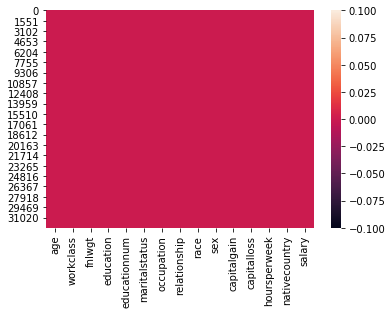

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
salary           0
dtype: int64

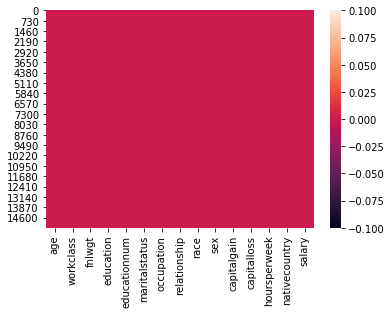

In [10]:
sns.heatmap(y.isnull())

In [11]:
y.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
salary           0
dtype: int64

# Checking ?

In [12]:
(df == '?').sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
salary           0
dtype: int64

In [13]:
(y == '?').sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
salary           0
dtype: int64

# Using Label Encoder

In [14]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'].astype(str))
df['education'] = le.fit_transform(df['education'].astype(str))
df['maritalstatus'] = le.fit_transform(df['maritalstatus'].astype(str))
df['occupation'] = le.fit_transform(df['occupation'].astype(str))
df['relationship'] = le.fit_transform(df['relationship'].astype(str))
df['race'] = le.fit_transform(df['race'].astype(str))
df['sex'] = le.fit_transform(df['sex'].astype(str))
df['nativecountry'] = le.fit_transform(df['nativecountry'].astype(str))
df['salary'] = le.fit_transform(df['salary'].astype(str))

In [16]:
df

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [17]:

le = LabelEncoder()
y['workclass'] = le.fit_transform(y['workclass'].astype(str))
y['education'] = le.fit_transform(y['education'].astype(str))
y['maritalstatus'] = le.fit_transform(y['maritalstatus'].astype(str))
y['occupation'] = le.fit_transform(y['occupation'].astype(str))
y['relationship'] = le.fit_transform(y['relationship'].astype(str))
y['race'] = le.fit_transform(y['race'].astype(str))
y['sex'] = le.fit_transform(y['sex'].astype(str))
y['nativecountry'] = le.fit_transform(y['nativecountry'].astype(str))
y['salary'] = le.fit_transform(y['salary'].astype(str))

In [18]:
y

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15310,33,2,245211,9,13,4,9,3,4,1,0,0,40,37,0
15311,39,2,215419,9,13,0,9,1,4,0,0,0,36,37,0
15312,38,2,374983,9,13,2,9,0,4,1,0,0,50,37,0
15313,44,2,83891,9,13,0,0,3,1,1,5455,0,40,37,0


# Univarient Analysis

In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationnum',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'salary'],
      dtype='object')

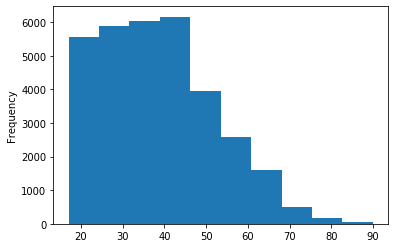

In [20]:
df["age"].plot.hist()

In [21]:
df1.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

Maximum people belong to the age group of 30-50

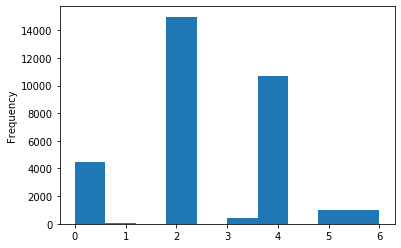

In [22]:
df["maritalstatus"].plot.hist()

In [23]:
df1.maritalstatus.value_counts

<bound method IndexOpsMixin.value_counts of 0              Never-married
1         Married-civ-spouse
2                   Divorced
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32556     Married-civ-spouse
32557     Married-civ-spouse
32558                Widowed
32559          Never-married
32560     Married-civ-spouse
Name: maritalstatus, Length: 32561, dtype: object>

In [24]:
df.maritalstatus.value_counts

<bound method IndexOpsMixin.value_counts of 0        4
1        2
2        0
3        2
4        2
        ..
32556    2
32557    2
32558    6
32559    4
32560    2
Name: maritalstatus, Length: 32561, dtype: int32>

Frequency is highest for Married-civ-spouse status

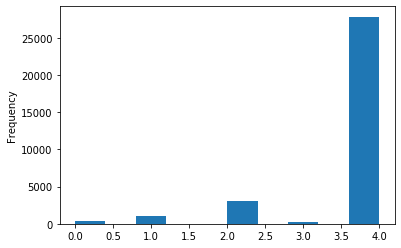

In [25]:
df["race"].plot.hist()

In [26]:
df1.race.value_counts

<bound method IndexOpsMixin.value_counts of 0         White
1         White
2         White
3         Black
4         Black
          ...  
32556     White
32557     White
32558     White
32559     White
32560     White
Name: race, Length: 32561, dtype: object>

In [27]:
df.maritalstatus.value_counts

<bound method IndexOpsMixin.value_counts of 0        4
1        2
2        0
3        2
4        2
        ..
32556    2
32557    2
32558    6
32559    4
32560    2
Name: maritalstatus, Length: 32561, dtype: int32>

More white people are there than black

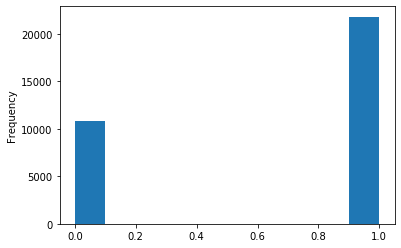

In [28]:
df["sex"].plot.hist()

In [29]:
df1.sex.value_counts

<bound method IndexOpsMixin.value_counts of 0           Male
1           Male
2           Male
3           Male
4         Female
          ...   
32556     Female
32557       Male
32558     Female
32559       Male
32560     Female
Name: sex, Length: 32561, dtype: object>

In [30]:
df.sex.value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 32561, dtype: int32>

More males are there then females

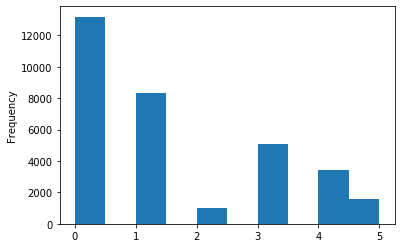

In [31]:
df["relationship"].plot.hist()

In [32]:
df1.relationship.value_counts

<bound method IndexOpsMixin.value_counts of 0         Not-in-family
1               Husband
2         Not-in-family
3               Husband
4                  Wife
              ...      
32556              Wife
32557           Husband
32558         Unmarried
32559         Own-child
32560              Wife
Name: relationship, Length: 32561, dtype: object>

In [33]:
df.relationship.value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        0
2        1
3        0
4        5
        ..
32556    5
32557    0
32558    4
32559    3
32560    5
Name: relationship, Length: 32561, dtype: int32>

Highest frequency for Husband 

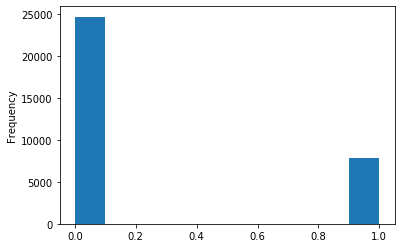

In [34]:
df["salary"].plot.hist()

In [35]:
df1.salary.value_counts

<bound method IndexOpsMixin.value_counts of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object>

In [36]:
df.salary.value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32>

More people have salary less than or equal to 50K

# Bivarient Analysis

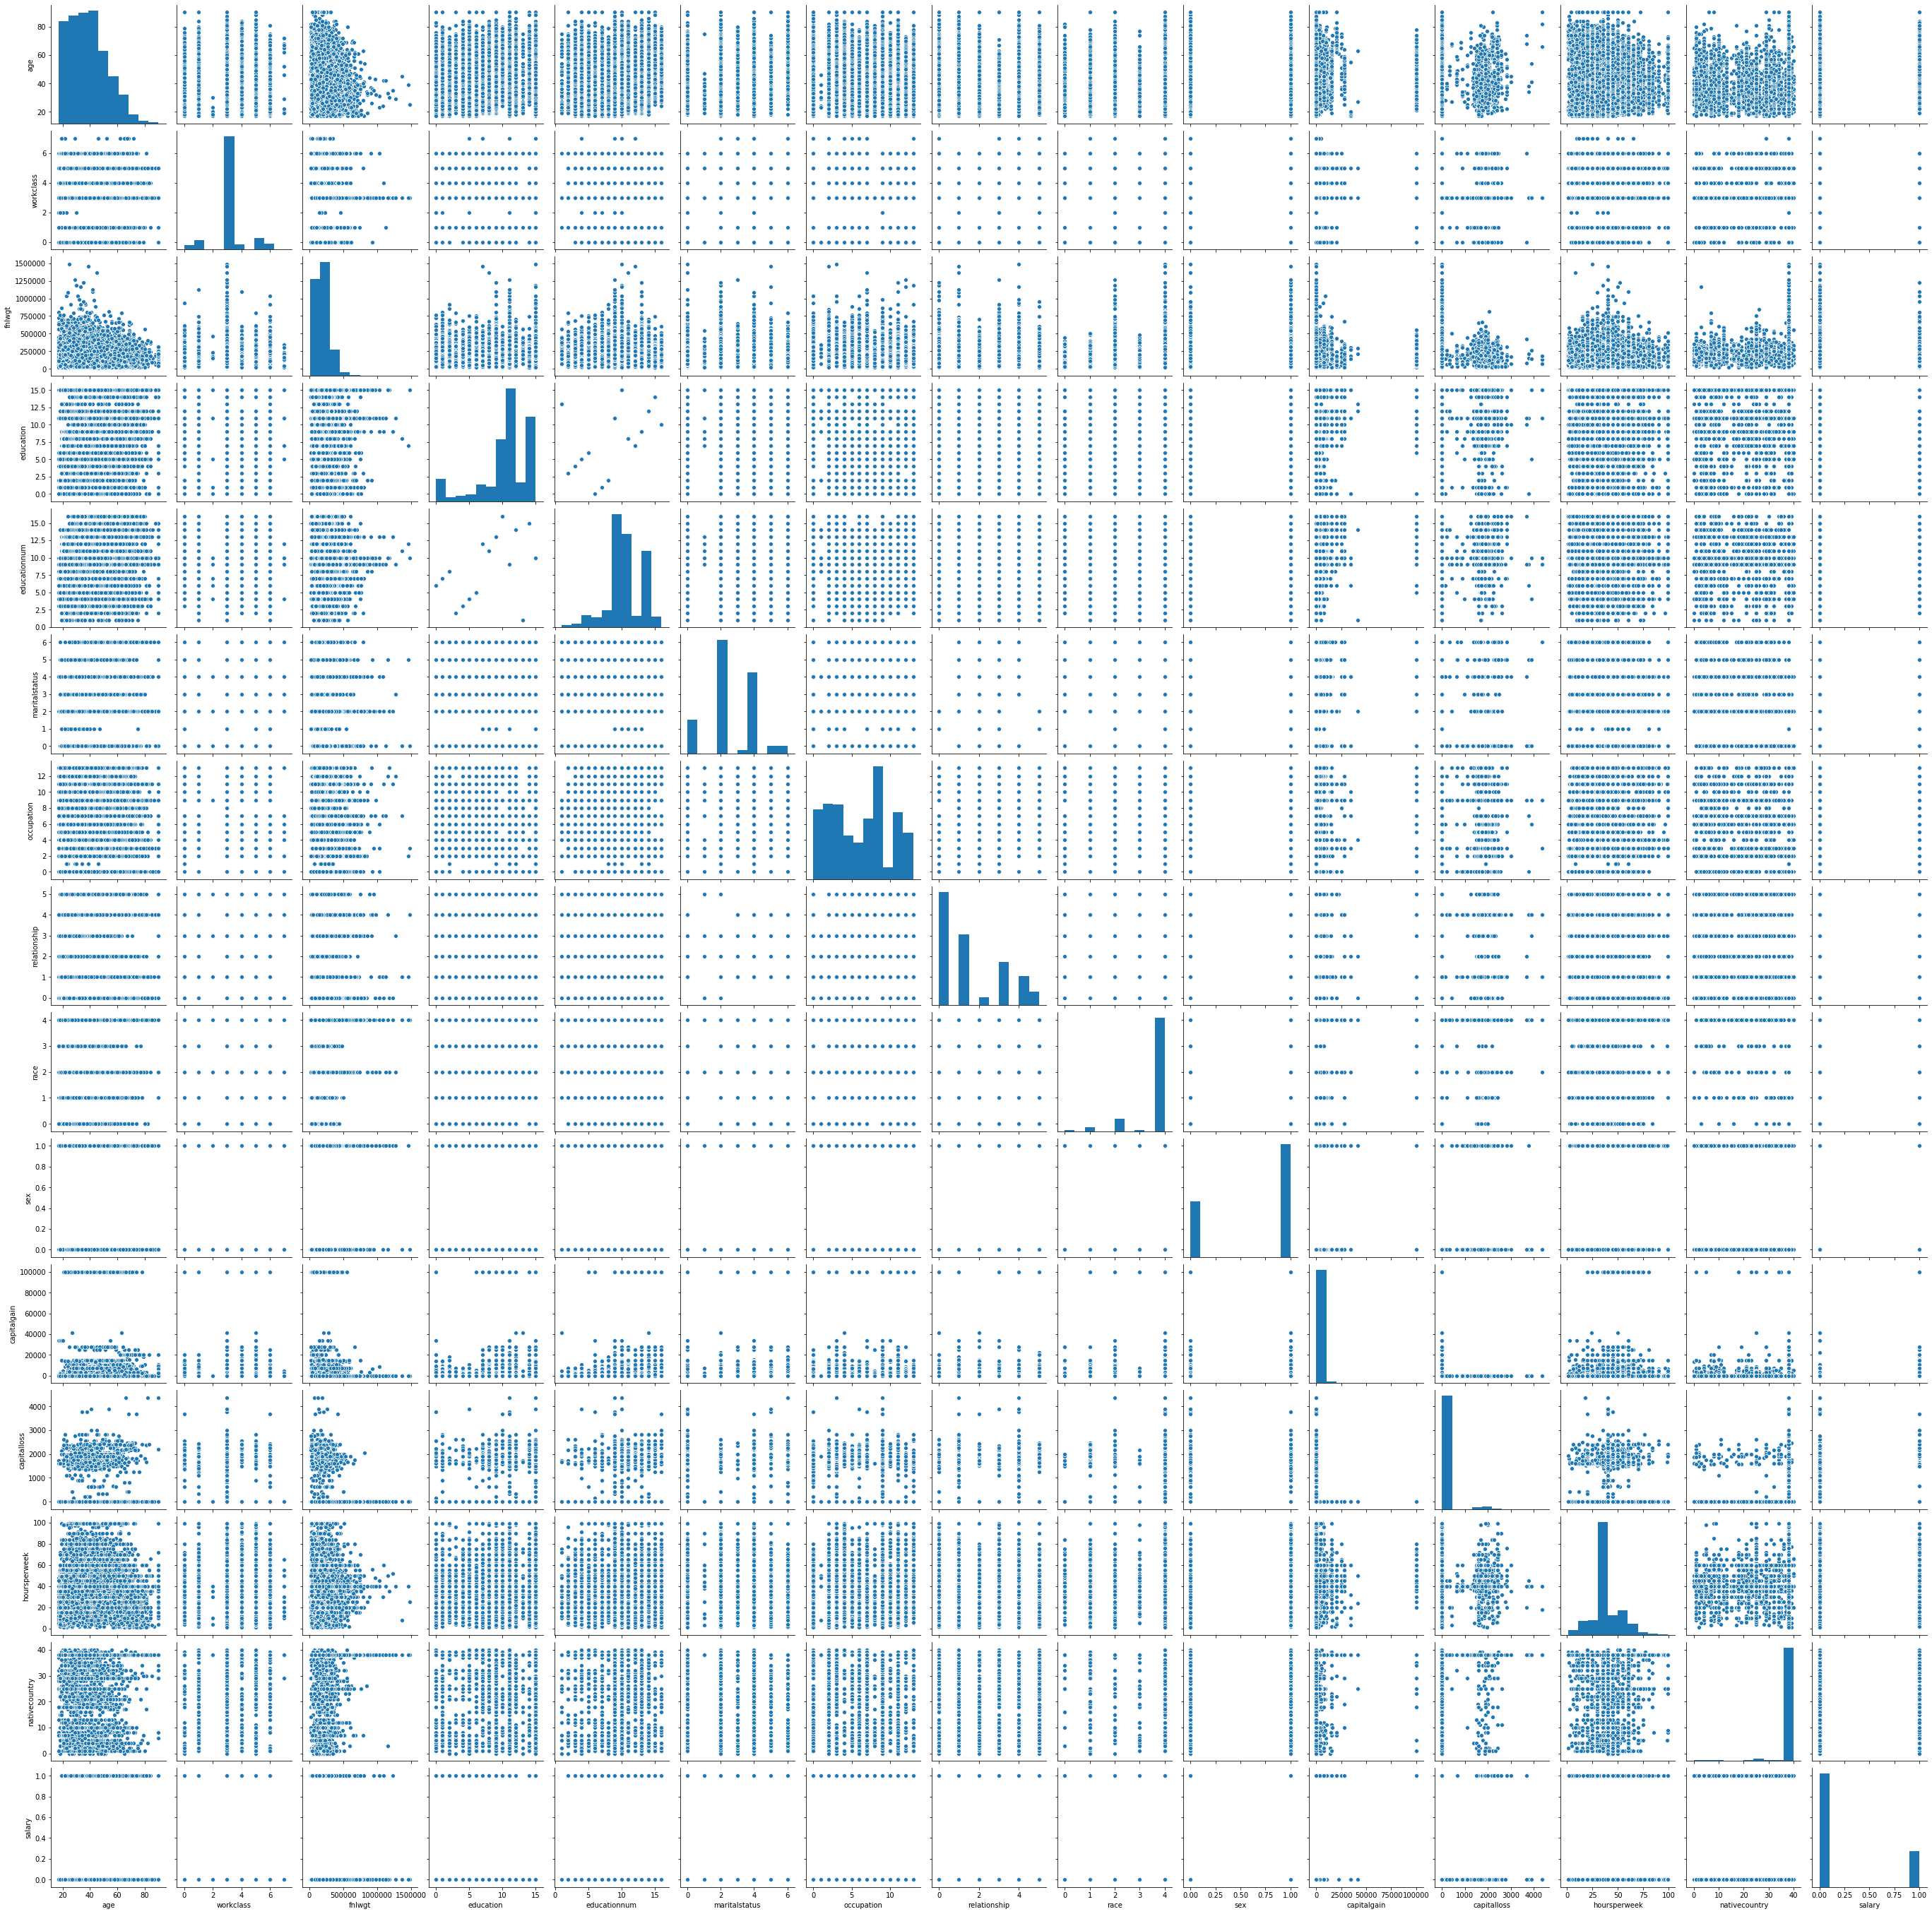

In [37]:
sns.pairplot(df)

In [38]:
df.corr()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
educationnum,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
maritalstatus,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
sex,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


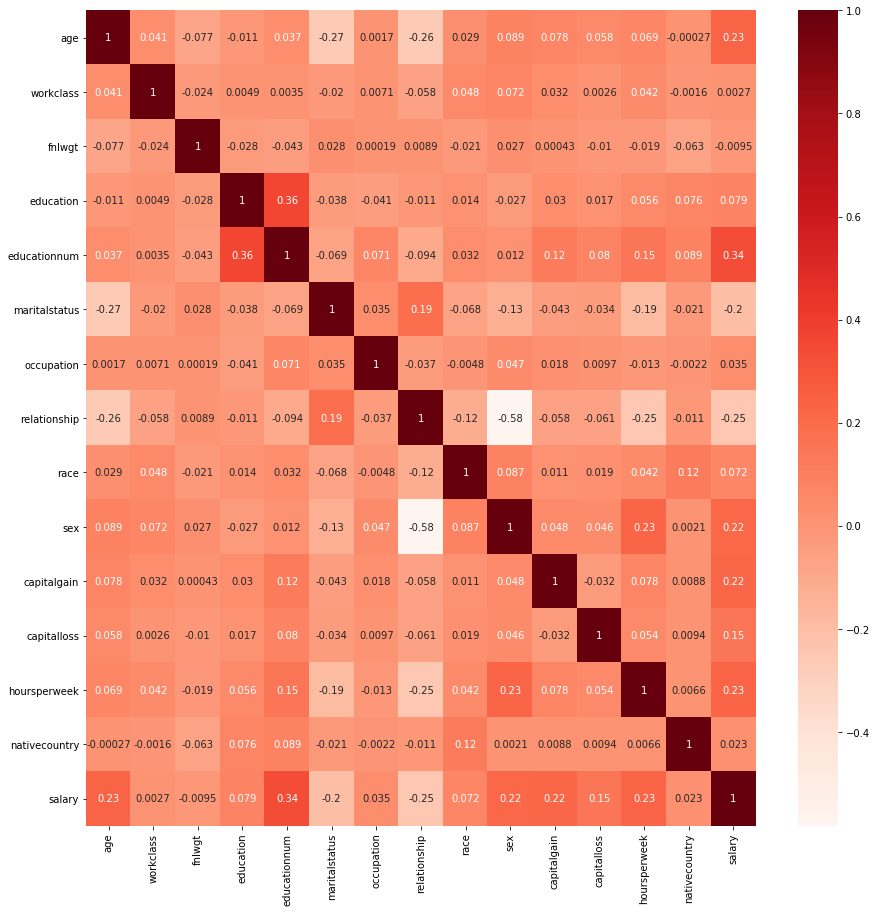

In [39]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr() ,  cmap = "Reds" , annot = True)

Observations
1. Positive Correlation
Salaray  - age, education and hoursperweek

2. Negative Correlation
Salary - Marital Status (more for widowed/ singles) 
Salary - Relationship (Highest for Husbands and lowest for Wives)

# Checking and removing Outliers

In [40]:
df.describe()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,1.897784e+05,10.298210,10.080679,2.611836,6.138755,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.417155,0.240810
std,13.640433,1.107194,1.055500e+05,3.870264,2.572720,1.506222,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [41]:
collist = df.columns.values

ncol = 14
nrows = 10

collist

array(['age', 'workclass', 'fnlwgt', 'education', 'educationnum',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'salary'], dtype=object)

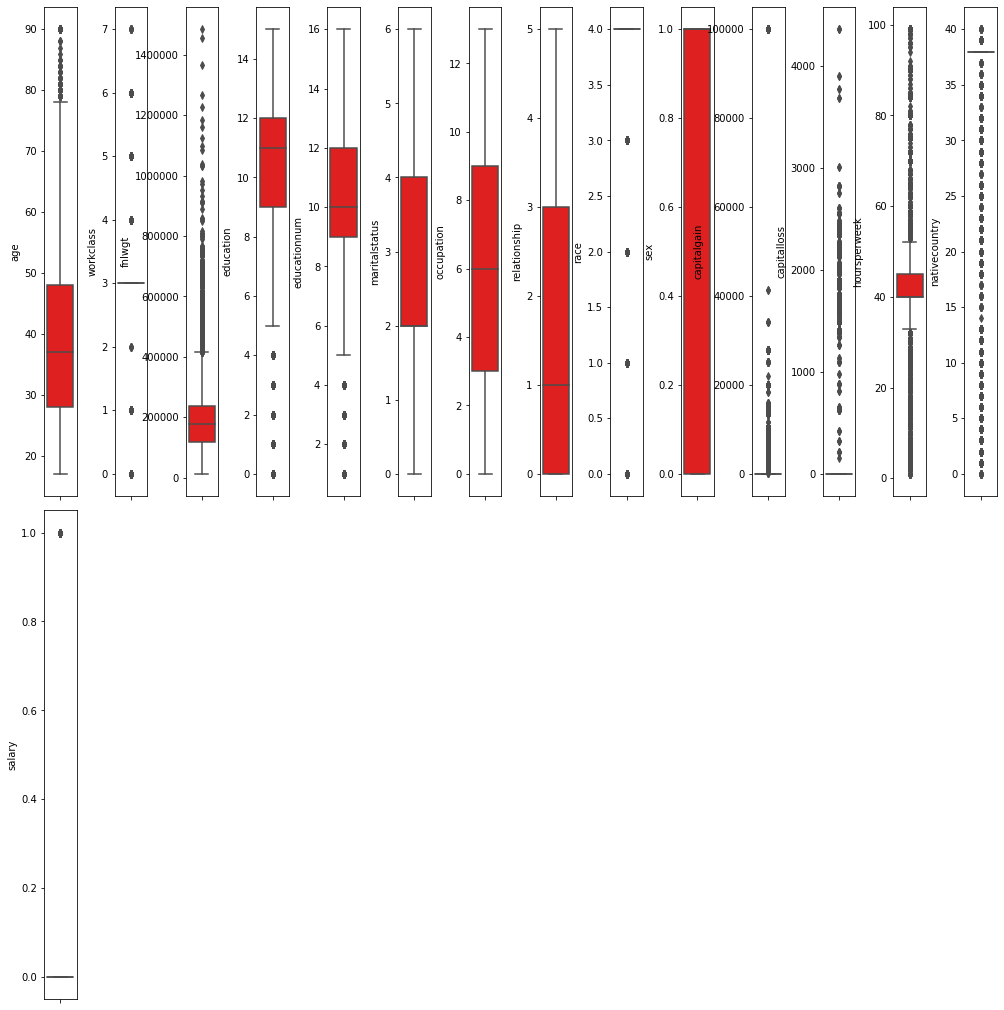

In [42]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(0 , len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df[collist[i]] , color = 'red' , orient = 'v')
    plt.tight_layout()

Outliers are persent in the data

In [43]:
# Removing outliers using Zscore

from scipy.stats import zscore


z = np.abs(zscore(df))
df_new = df[(z<3).all(axis = 1)]

df_new

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [44]:
df.shape

(32561, 15)

In [45]:
df_new.shape

(27771, 15)

5143 rows removed to remove outliers

In [51]:
collist = y.columns.values

ncol = 14
nrows = 10

collist

array(['age', 'workclass', 'fnlwgt', 'education', 'educationnum',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'salary'], dtype=object)

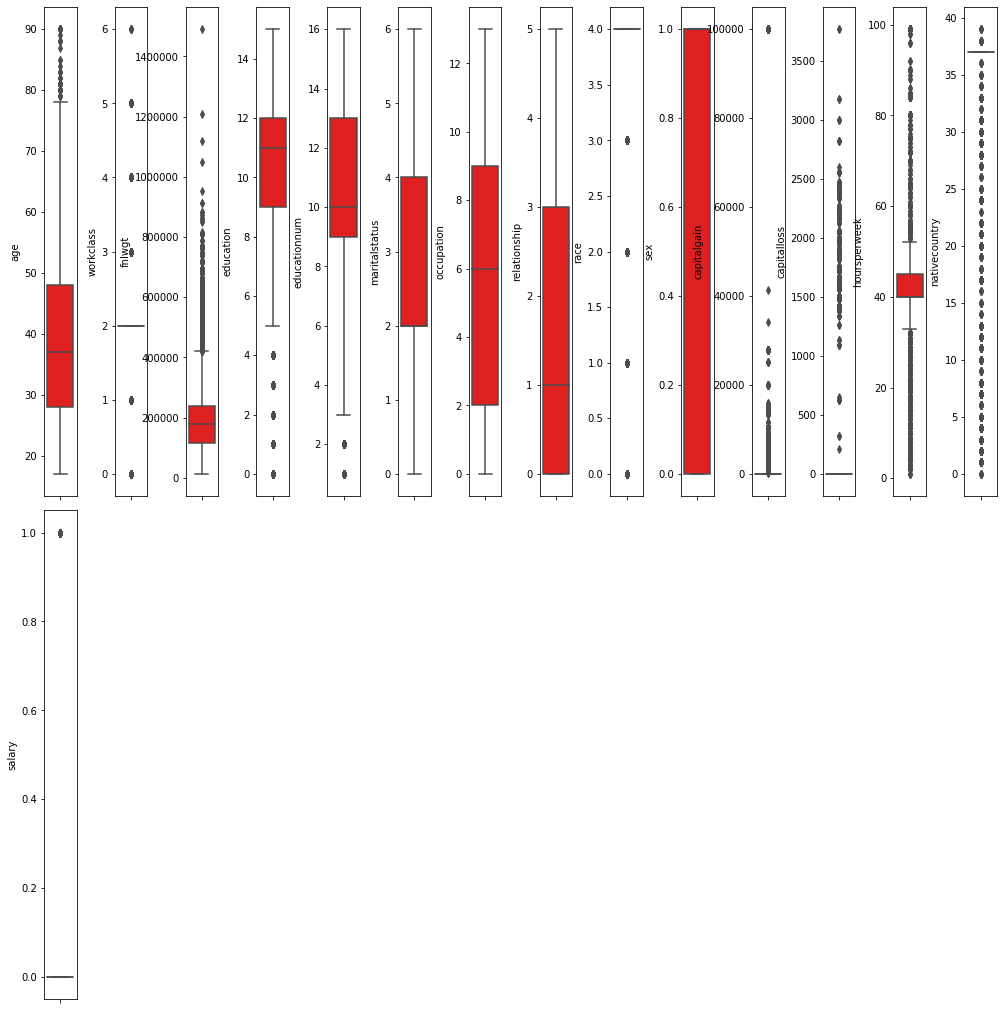

In [52]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(0 , len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y[collist[i]] , color = 'red' , orient = 'v')
    plt.tight_layout()

In [54]:
# Removing outliers using Zscore

z1 = np.abs(zscore(y))
y_new = y[(z1<3).all(axis = 1)]

y_new

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15309,48,1,349230,12,14,0,7,1,4,1,0,0,40,37,0
15310,33,2,245211,9,13,4,9,3,4,1,0,0,40,37,0
15311,39,2,215419,9,13,0,9,1,4,0,0,0,36,37,0
15312,38,2,374983,9,13,2,9,0,4,1,0,0,50,37,0


In [56]:
y.shape , y_new.shape

((15315, 15), (13085, 15))

2230 rows removed to remove outliers in y

# Splitting in to Attributes and Target variables

In [89]:
x_train = df_new.iloc[:,0:-1]

x_train

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [58]:
y_train = df_new.iloc[:,-1]

y_train = y_train.values.reshape(-1,1)

y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [90]:
x_test = y_new.drop(["salary"] , axis = 1)

x_test

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15309,48,1,349230,12,14,0,7,1,4,1,0,0,40,37
15310,33,2,245211,9,13,4,9,3,4,1,0,0,40,37
15311,39,2,215419,9,13,0,9,1,4,0,0,0,36,37
15312,38,2,374983,9,13,2,9,0,4,1,0,0,50,37


In [65]:
y_test = y_new["salary"]

y

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15310,33,2,245211,9,13,4,9,3,4,1,0,0,40,37,0
15311,39,2,215419,9,13,0,9,1,4,0,0,0,36,37,0
15312,38,2,374983,9,13,2,9,0,4,1,0,0,50,37,0
15313,44,2,83891,9,13,0,0,3,1,1,5455,0,40,37,0


In [67]:
y_test = y_test.values.reshape(-1,1)

x_test.shape , x_train.shape , y_train.shape , y_test.shape

((13085, 14), (27771, 14), (27771, 1), (13085, 1))

# Scaling x

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x1 = x_train

x2 = sc.fit_transform(x1)
x2 = pd.DataFrame(x2,columns = x1.columns)
x2

# Using x as skewness isnt gettting removed

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
0,0.063219,2.646979,-1.148888,-0.345104,1.212418,0.912004,-1.527444,-0.291222,0.344857,0.713188,0.685891,-0.037213,0.006512,0.188398
1,0.884458,1.738886,-1.087667,-0.345104,1.212418,-0.404895,-0.776716,-0.914107,0.344857,0.713188,-0.245007,-0.037213,-2.415627,0.188398
2,-0.011439,-0.077301,0.310383,0.171075,-0.440648,-1.721795,-0.276230,-0.291222,0.344857,0.713188,-0.245007,-0.037213,0.006512,0.188398
3,1.108432,-0.077301,0.511901,-2.409820,-1.267180,-0.404895,-0.276230,-0.914107,-2.958135,0.713188,-0.245007,-0.037213,0.006512,0.188398
4,-0.086097,-0.077301,1.038656,0.429164,1.625684,-0.404895,-0.776716,2.200316,0.344857,-1.402154,-0.245007,-0.037213,0.006512,0.188398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27766,-0.832678,-0.077301,0.750457,-0.861283,0.799151,-0.404895,1.475469,2.200316,0.344857,-1.402154,-0.245007,-0.037213,-0.172905,0.188398
27767,0.137877,-0.077301,-0.336924,0.171075,-0.440648,-0.404895,-0.025988,-0.914107,0.344857,0.713188,-0.245007,-0.037213,0.006512,0.188398
27768,1.481722,-0.077301,-0.362954,0.171075,-0.440648,2.228904,-1.527444,1.577431,0.344857,-1.402154,-0.245007,-0.037213,0.006512,0.188398
27769,-1.205968,-0.077301,0.160832,0.171075,-0.440648,0.912004,-1.527444,0.954547,0.344857,0.713188,-0.245007,-0.037213,-1.787665,0.188398


In [69]:
x3 = x_test

x3 = sc.fit_transform(x_test)
x3 = pd.DataFrame(x3,columns = x_test.columns)
x3


,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
0,-1.014993,-0.211767,0.429117,-2.431031,-1.285808,0.924602,0.009058,0.994847,-3.011581,0.705324,-0.244634,-0.032146,-0.033852,0.183529
1,-0.025326,-0.211767,-1.016508,0.181575,-0.457673,-0.396763,-0.485839,-0.894953,0.338745,0.705324,-0.244634,-0.032146,0.893028,0.183529
2,-0.786608,-1.259393,1.591513,-0.863468,0.784528,-0.396763,0.998853,-0.894953,0.338745,0.705324,-0.244634,-0.032146,-0.033852,0.183529
3,0.431444,-0.211767,-0.272431,1.226617,-0.043606,-0.396763,0.009058,-0.894953,-3.011581,0.705324,3.154073,-0.032146,-0.033852,0.183529
4,-0.329839,-0.211767,0.132485,-2.692292,-1.699875,0.924602,0.256507,-0.265020,0.338745,0.705324,-0.244634,-0.032146,-0.960732,0.183529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13080,0.735957,-1.259393,1.721092,0.442835,1.612663,-1.718128,0.256507,-0.265020,0.338745,0.705324,-0.244634,-0.032146,-0.033852,0.183529
13081,-0.405967,-0.211767,0.623386,-0.340947,1.198596,0.924602,0.751404,0.994847,0.338745,0.705324,-0.244634,-0.032146,-0.033852,0.183529
13082,0.050803,-0.211767,0.308993,-0.340947,1.198596,-1.718128,0.751404,-0.265020,0.338745,-1.417788,-0.244634,-0.032146,-0.404604,0.183529
13083,-0.025326,-0.211767,1.992862,-0.340947,1.198596,-0.396763,0.751404,-0.894953,0.338745,0.705324,-0.244634,-0.032146,0.893028,0.183529


# Data Analysis - Logistic Regression

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, auc, roc_curve


In [73]:
x_train = x2
x_test = x3

x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((27771, 14), (13085, 14), (27771, 1), (13085, 1))

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [75]:
lreg = LogisticRegression()
knr = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()

In [76]:
#Best parameter for Logistic Regression

parameters = { 'penalty' : ('11', '12' , 'none')}
gs = GridSearchCV(lreg , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'penalty': 'none'}

In [77]:
#Best parameter for KNearestNeighbors

parameters = { 'n_neighbors' : (1,10)}
gs = GridSearchCV(knr , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'n_neighbors': 10}

In [78]:
#Best parameter for Decision Tree

parameters = { 'criterion' : ('gini' , 'entropy') }
gs = GridSearchCV(dtc , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'entropy'}

In [79]:
lreg = LogisticRegression(penalty = 'none')
knr = KNeighborsClassifier( n_neighbors = 10 )
dtc = DecisionTreeClassifier(criterion = 'entropy')
svc = SVC()

In [80]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
accuracyscore = accuracy_score(y_test,pred)
confmatrix = confusion_matrix(y_test,pred)
classreport = classification_report(y_test,pred)


print("Accuracy Score : " , accuracyscore)
print("\nConfusion Matrix : " , confmatrix)
print("\nClassification Report : " , classreport)

Accuracy Score :  0.8240733664501337

Confusion Matrix :  [[9592  515]
 [1787 1191]]

Classification Report :                precision    recall  f1-score   support

           0       0.84      0.95      0.89     10107
           1       0.70      0.40      0.51      2978

    accuracy                           0.82     13085
   macro avg       0.77      0.67      0.70     13085
weighted avg       0.81      0.82      0.81     13085



In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
#Best parameter for GradientBooster

gbr = GradientBoostingClassifier()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(gbr , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [82]:
#Best parameter for Random Forest

rf = RandomForestClassifier()
parameters = {  "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(rf , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_


{'n_estimators': 100}

In [82]:

gbr = GradientBoostingClassifier(learning_rate = 0.1 ,n_estimators = 500 )
rf = RandomForestClassifier(n_estimators = 100)


In [83]:
models = []
models.append(('KNeighborsClassifier' , knr))
models.append(('LogisticRegression' , lreg))
models.append(('GradientBooster' , gbr))
models.append(('RandomForestClassifier' , rf))
models.append(('DecisionTreeClassifier' , dtc))
models.append(('SVC' , svc))


models

[('KNeighborsClassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                       weights='uniform')),
 ('LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='none',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('GradientBooster',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
              

In [85]:
Model = []
accuracyscore = []
cv = []
rocscore = []

for name,model in models:
    print("***************************" , name , "***************************\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred = model.predict(x_test)
    print("\n")
    AS = accuracy_score(y_test,pred)
    print("Accuracy Score :" , AS)
    accuracyscore.append(AS*100)
    print("\n")
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    #roc_cur = auc(false_positive_rate,true_positive_rate)
    #rocscore.append(roc_cur*100)
    #print("\n")
    confmatrix = confusion_matrix(y_test,pred)
    print("Confusion Matrix : " , confmatrix)
    print("\n")
    classreport = classification_report(y_test,pred)
    print("Classification Report : " , classreport)
    print("\n")
    

*************************** KNeighborsClassifier ***************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score : 0.8428735192969049


Confusion Matrix :  [[9473  634]
 [1422 1556]]


Classification Report :                precision    recall  f1-score   support

           0       0.87      0.94      0.90     10107
           1       0.71      0.52      0.60      2978

    accuracy                           0.84     13085
   macro avg       0.79      0.73      0.75     13085
weighted avg       0.83      0.84      0.83     13085



*************************** LogisticRegression ***************************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
 

In [87]:
result = pd.DataFrame({'Model' : Model , 'Accuracy Score' :accuracyscore })

result

,Model,Accuracy Score
0,KNeighborsClassifier,84.287352
1,LogisticRegression,82.407337
2,GradientBooster,85.364922
3,RandomForestClassifier,84.111578
4,DecisionTreeClassifier,79.701949
5,SVC,84.952235


In [91]:
# Please note here we are using unscalled data as it is giving better results

x_train = x_train
x_test = x_test

gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
accuracyscore = accuracy_score(y_test,pred)

print("Accuracy Score : " , accuracyscore)
print("\nConfusion Matrix : " , confmatrix)
print("\nClassification Report : " , classreport)

Accuracy Score :  0.8629728696981276

Confusion Matrix :  [[9653  454]
 [1515 1463]]

Classification Report :                precision    recall  f1-score   support

           0       0.86      0.96      0.91     10107
           1       0.76      0.49      0.60      2978

    accuracy                           0.85     13085
   macro avg       0.81      0.72      0.75     13085
weighted avg       0.84      0.85      0.84     13085



# Predicting Data

In [92]:
#  Gradient Booster model is used as accuracy score is maximum 

df_pred = gbr.predict(x_test)

df_predict = pd.DataFrame(df_pred)

df_predict

,0
0,0
1,0
2,0
3,1
4,0
...,...
13080,0
13081,0
13082,0
13083,1


# Saving the Model

In [93]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(gbr , 'p6_salary.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('p6_salary.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1])

In [94]:
# Saving Predict to csv

df_predict.to_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/salary_predict.csv")